In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from pandas_datareader import data

Read data:

In [3]:
df = data.DataReader('GOOG', start = '2004', end = '2016', data_source = 'yahoo')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


Data doesn't contain some days!

Resample vs Original Data:

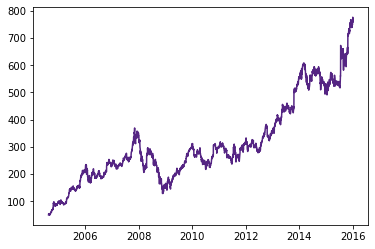

In [5]:
plt.plot(df.index, df['Close'], color = '#552583')
plt.show()
plt.close()

Resample rules: https://stackoverflow.com/questions/17001389/pandas-resample-documentation

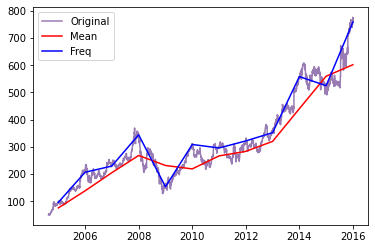

In [8]:
# BA is business year end
mean_res = df['Close'].resample('BA').mean()  # get mean for each interval
freq_res = df['Close'].resample('BA').asfreq()  # get last value of each interval

plt.plot(df.index, df['Close'], color = '#552583', alpha = 0.6, label = 'Original')
plt.plot(mean_res.index, mean_res, color = '#ff0000', label = 'Mean')
plt.plot(freq_res.index, freq_res, color = '#0000ff', label = 'Freq')
plt.legend()
plt.show()
plt.close()

In [9]:
df.index[: 10]

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

Time shifts:

In [11]:
dat = df['Close'].asfreq('D', method = 'ffill')
dat.head()

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-21    53.952770
2004-08-22    53.952770
2004-08-23    54.495735
Freq: D, Name: Close, dtype: float64

Notice how 21st and 22nd are forward filled using data from 20th

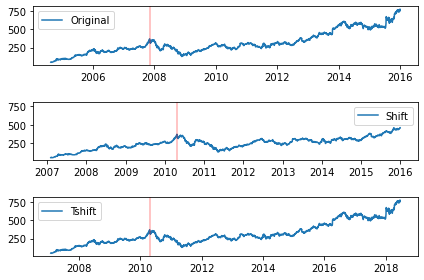

In [15]:
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

shift_dat = dat.shift(900)  # shifts data
tshift_dat = dat.tshift(900)  # shifts index

fig, ax = plt.subplots(3, 1, sharey = True)

ax[0].plot(dat.index, dat)
ax[0].legend(['Original'])
ax[0].axvline(local_max, alpha = 0.3, color = '#ff0000')

ax[1].plot(shift_dat.index, shift_dat)
ax[1].legend(['Shift'])
ax[1].axvline(local_max + offset, alpha = 0.3, color = '#ff0000')

ax[2].plot(tshift_dat.index, tshift_dat)
ax[2].legend(['Tshift'])
ax[2].axvline(local_max + offset, alpha = 0.3, color = '#ff0000')

fig.tight_layout(h_pad = 2)  # add padding between each plot
plt.show()
plt.close()

In [17]:
shift_dat.tail()  # data shifted by 900 days

Date
2015-12-27    451.303406
2015-12-28    458.401794
2015-12-29    459.776642
2015-12-30    459.776642
2015-12-31    459.776642
Freq: D, Name: Close, dtype: float64

In [18]:
tshift_dat.tail()  # index shifted by 900 days

Date
2018-06-14    748.400024
2018-06-15    762.510010
2018-06-16    776.599976
2018-06-17    771.000000
2018-06-18    758.880005
Freq: D, Name: Close, dtype: float64

Time shifts can be used to calculate differences over time eg. one year ROI:

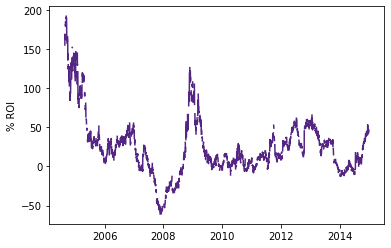

In [23]:
close = df['Close']

roi = ((close.tshift(-365, freq = 'D') / close) - 1) * 100

plt.plot(roi.index, roi, color = '#552583')
plt.ylabel('% ROI')
plt.show()
plt.close()

Rolling Windows:

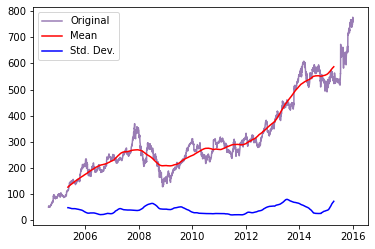

In [26]:
rolling = df['Close'].rolling(window = 365, center = True)  # 365 day window

roll_mean = rolling.mean()
roll_std = rolling.std()

plt.plot(df.index, df['Close'], color = '#552583', alpha = 0.6, label = 'Original')
plt.plot(roll_mean.index, roll_mean, color = '#ff0000', label = 'Mean')
plt.plot(roll_std.index, roll_std, color = '#0000ff', label = 'Std. Dev.')
plt.legend()
plt.show()
plt.close()

Ref: https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html